## Introduction to Iterators

- for loop is an iterator
- Iterables - lists, strings, dictionaries, file connections

### Iterables:

- an object with an associated iter() method
- Applying iter() to an iterable creates an interator
- Applying iter() to an iterable creates an iterator

### Iterator:

- An object that has an associated next() method that produces the consecutive values
- Throws an Stop Iteration Error when there is nothing left to return
- To iterate over dictionaries, we need to unpack them


In [3]:
# ITERATORS:

Word = "WORD"
it = iter(Word)
print(next(it))
print(next(it))
print(next(it))
print(next(it))
print(next(it))


W
O
R
D


StopIteration: 

In [5]:
# ITERATING AT ONCE WITH *

Word = "WORD"
it = iter(Word)
print(*it)

W O R D


In [6]:
# ITERATING OVER DICTIONARIES:

pythonistas = {'hugo':'bowne-anderson', 'francis':'castro'}
for key, value in pythonistas.items():
    print(key, value)

hugo bowne-anderson
francis castro


In [ ]:
# ITERATING OVER FILE CONNECTIONS:
file = open('file.txt')
it = iter(file)
print(next(it))   # The next function returns the next line from the file

### Enumerate:

- Enumerate takes any iterable as an argument and returns a special enumerate object which consists of pairs consisting the elements of the orignal iterable along with their index 
- Enumerate object is also an iterable 

In [10]:
# ENUMERATE

avengers = ['hawkeye', 'iron man', 'thor', 'quicksilver']
e = enumerate(avengers)
print(type(e))
e_list = list(e)
print(e_list)

# Unpacking an enumerate object:
for index, value in enumerate(avengers):
    print(index, value)

# Changing Indexing of enumerate object
for index, value in enumerate(avengers, start = 10):
    print(index, value)


<class 'enumerate'>
[(0, 'hawkeye'), (1, 'iron man'), (2, 'thor'), (3, 'quicksilver')]
0 hawkeye
1 iron man
2 thor
3 quicksilver
10 hawkeye
11 iron man
12 thor
13 quicksilver


### Zip()

- Accepts an arbitary number of iterables and returns an iterator of tuples


In [14]:
# ZIP

avengers = ['hawkeye', 'iron man', 'thor', 'quicksilver']
names = ['barton', 'stark', 'odinson', 'maximoff']
z = zip(avengers, names)
print(type(z))

z_list = list(z)
print(z_list)

# Using for loop to iterate over zipped objects:

for z1, z2 in zip(avengers, names):
    print(z1, z2)

# Printing all elements using *(Splat Operator)
z = zip(avengers, names)
print(*z)

<class 'zip'>
[('hawkeye', 'barton'), ('iron man', 'stark'), ('thor', 'odinson'), ('quicksilver', 'maximoff')]
hawkeye barton
iron man stark
thor odinson
quicksilver maximoff
('hawkeye', 'barton') ('iron man', 'stark') ('thor', 'odinson') ('quicksilver', 'maximoff')


### Using Iterators to load large files into memory 

- There can be too much data to hold in memory
- Solution: 
1) Load the data in chunks
2) perform the desired operations
3) Store the result
4) Discard the chunk
5) Load in the next chunk of data

- pandas method read_csv() allows us to load data in chunks. It has an argument 'chunksize' to determine the size of the chunks.

In [ ]:
# USING ITERATORS TO LOAD FILES INTO MEMORY:

import pandas as pd
result = []
for chunk in pd.read_csv('data.csv', chunksize=1000):
    result.append(sum(chunk['x']))
total = sum(result)
print(total)


### List Comprehensions:

- Allows us to create lists from other lists, DataFrames Columns, etc.

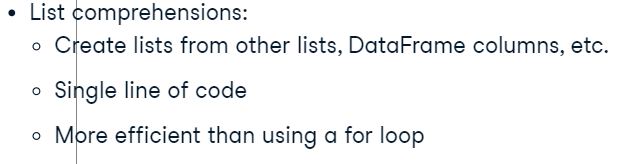


In [4]:
# LIST COMPREHENSION

nums = [12, 8, 21, 3, 16]
new_nums = [num + 1 for num in nums]
print(new_nums)

# LIST COMPREHENSION USING RANGE

new_nums = [num for num in range(11)]
print(new_nums)

# NESTED LOOPS USING LIST COMPREHENSION:
pairs2 = [(num1, num2) for num1 in range(0, 2 )for num2 in range(6, 8)]
print(pairs2)

[13, 9, 22, 4, 17]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[(0, 6), (0, 7), (1, 6), (1, 7)]


### Advanced Comprehensions:

In [7]:
# CONDITIONALS ON THE ITERABLE
print([num**2 for num in range(10) if num%2 == 0])
print([num ** 2 if num % 2 == 0 else 0 for num in range(10)])

[0, 4, 16, 36, 64]
[0, 0, 4, 0, 16, 0, 36, 0, 64, 0]


### Dictionary Comprehensions:

- use {} instead of []

In [9]:
# DICTIONARY COMPREHENSIONS

pos_neg = {num: -num for num in range(9)}
print(pos_neg)
print(type(pos_neg))

{0: 0, 1: -1, 2: -2, 3: -3, 4: -4, 5: -5, 6: -6, 7: -7, 8: -8}
<class 'dict'>


### Generator Expressions:

- A generator is like a list comprehension except it does not store the list in memory
- It does not construct the list, but is an object we can iterate over to produce elements of the list as required
- generators return a generator object 
- Lazy evaluation can be used when working with extremly large sequences as we dont want to store the entire list in memory

In [16]:
# GENERATOR
result = (num for num in range(6))
for num in result:
    print(num)

# Creating list from generator
result = (num for num in range(6))
print(list(result))

# LAZY EVALUATION
result = (num for num in range(6))
print(next(result))
print(next(result))
print(next(result))
print(next(result))
print(next(result))
print(next(result))

# Conditionals in Generators:
even_nums = (num for num in range(10) if num%2 == 0)
print(list(even_nums))

0
1
2
3
4
5
[0, 1, 2, 3, 4, 5]
0
1
2
3
4
5
[0, 2, 4, 6, 8]


### Generator Functions

- Functions that when called, return generator objects
- defined like a regular function (using def)
- Yields a sequence of values instead of returning a single value
- Use the yield keyword

In [18]:
# GENERATOR FUNCTION:

def num_sequence(n):
    """Generate values from 0 to n"""
    i = 0
    while i<n:
        yield i
        i += 1

result = num_sequence(5)
print(type(result))
for item in result:
    print(item)

<class 'generator'>
0
1
2
3
4
